# HSE 2021: Mathematical Methods for Data Analysis

## Homework 1

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random
from math import sqrt

from numpy.random import RandomState

# used to setup random seed
rs = np.random.RandomState(1234)
random.seed(11)

# 1. Python (2 points)

**Task 1** (0.5 points)<br/> 
Enter numbers `a`,  `d` и `N`. Find sum of the first `N` members of arithmetic progression with the first member `a` and difference `d`, without using formula for the sum.

In [2]:
def find_sum(a,d,N):
    arr_sum = sum([i * d + a for i in range(N)])
    return arr_sum

a = 2
d = 3
N = 15
print(find_sum(a,d,N))

345


**Task 2** (0.5 points) <br/> 
Enter an integer number `N`. Check if it is a prime number.

In [3]:
def check_prime(N):
    check_result = True

    if N <= 1 : 
        check_result = False
    elif N <= 3 : 
        check_result = True
    elif N % 2 == 0 or N % 3 == 0 : 
        check_result  = False
    else:
        i = 5
        while i * i <= N: 
            if N % i == 0 or N % (i + 2) == 0: 
                check_result  = False
                break
            i += 6
        
    return check_result

for N in [3,8, 13, 111, 113, 237, 307, 479, 481]:
    print(N, check_prime(N))

3 True
8 False
13 True
111 False
113 True
237 False
307 True
479 True
481 False


**Task 3** (0.5 points) <br/> 
Find the first `N` prime numbers (you may use the function from the precious task).

In [4]:
def find_primes(N):
    primes = []

    if N >= 1:
        primes.append(2)
    
    if N >= 2:
        primes.append(3)

        i = 0
        while len(primes) < N:
            if check_prime(i - 1):
                primes.append(i - 1)
            if check_prime(i + 1):
                primes.append(i + 1)
            i += 6
        
        if len(primes) > N:
            primes = primes[:-1]
    return primes

print(find_primes(5))
print(find_primes(10))
print(find_primes(20))

[2, 3, 5, 7, 11]
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71]


**Task 4** (0.5 points) <br/> 
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` and other functions, find the maximum number.

In [5]:
from random import randint
def find_max(a, b, c):
    max_ = a
    if max_ < b:
        max_ = b
    if max_ < c:
        max_ = c

    return max_

for i in range(10):
    
    a = rs.randint(-100, 100)
    b = rs.randint(-100, 100)
    c = rs.randint(-100, 100)
    
    print(a, b, c, '\tMaximum:', find_max(a, b, c))

-53 -62 -47 	Maximum: -47
16 52 43 	Maximum: 52
77 -77 54 	Maximum: 77
-70 71 58 	Maximum: 71
24 -74 18 	Maximum: 24
86 20 12 	Maximum: 86
-31 -20 27 	Maximum: 27
75 -50 -24 	Maximum: 75
-63 -66 66 	Maximum: 66
95 39 28 	Maximum: 95


# 2. Numpy (4 points)

**Task 1** (0.5 points) <br/>
Create a random array (`rs.rand()`) with length of 10 and with sum of its elements equals to 2.

In [6]:
my_array = rs.rand(10)
_sum = np.sum(my_array)
my_array /= (_sum / 2)
print(len(my_array))
print(np.sum(my_array))

10
1.9999999999999998


**Task 2** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length. 

Calculate the following distances between the arrays **without using special funcrion. You may only use basic numpy operations.**:

* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2}$$

In [7]:
def cal_euclidean(a, b):    
    distance = sqrt(((a - b) ** 2).sum())
    return distance

def cal_manhattan(a, b):    
    distance = np.abs(a - b).sum()
    return distance

def cal_cosine(a, b):    
    distance = 1 - np.dot(a.T, b) / (cal_euclidean(a, 0) * cal_euclidean(b, 0))
    return distance

In [8]:
a = rs.randint(-10, 10, size=10)
b = rs.randint(-10, 10, size=10)
print(cal_euclidean(a, b))
print(cal_manhattan(a, b))
print(cal_cosine(a, b))

23.2379000772445
58
0.8516611889193367


**Task 3** (0.5 points) <br/>
Create a random array (`rs.randint()`) with length of 100. Transform the array so that 
* Maximum element(s) value is 1
* Minimum element(s) value is 0
* Other values are in interval 0-1 with keeping the order

In [9]:
def normalize(v):
    max_ = v.max()
    min_ = v.min()
    return (v - min_) / (max_ - min_)

my_array = normalize(rs.randint(-100, 100, size=100))
print(np.max(my_array), np.min(my_array))
print(my_array)

1.0 0.0
[0.18592965 0.54773869 0.19095477 0.67839196 0.9798995  0.66834171
 0.2361809  0.59296482 0.87939698 0.71859296 0.17085427 0.05025126
 0.14070352 0.0201005  0.4120603  0.51758794 0.44723618 0.27638191
 0.3919598  0.75879397 0.89447236 0.31155779 0.91959799 0.42211055
 0.52763819 0.         0.6080402  0.49246231 0.45226131 0.80904523
 0.57286432 0.6080402  0.10552764 1.         0.98492462 0.59798995
 0.90452261 0.96482412 0.58291457 0.52763819 0.57286432 0.84924623
 0.00502513 0.71356784 0.01507538 0.15075377 0.70351759 0.54773869
 0.09547739 0.13065327 0.34170854 0.61809045 0.32160804 0.75376884
 0.92462312 0.68341709 0.86432161 0.7638191  0.07537688 0.36180905
 0.65326633 0.72361809 0.53768844 0.65326633 0.39698492 0.9798995
 0.23115578 0.28643216 0.91959799 0.18090452 0.44221106 0.80904523
 0.6080402  0.85427136 0.01005025 0.54773869 0.1758794  0.09045226
 0.38190955 0.98994975 0.5879397  0.40703518 0.04020101 0.37688442
 0.07537688 0.10050251 0.08040201 0.96482412 0.30653266

**Task 4** (0.5 points) <br/>
Create an array with shape of $5 \times 6$ with integers from [0,50]. Print a column that contains the maximum element of the array.

In [10]:
my_array = rs.randint(0, 51, size=(5, 6))
selected_column = my_array[:,np.unravel_index(np.argmax(my_array, axis=None), my_array.shape)[1]]
print('Shape: ',my_array.shape)
print('Array')
print(my_array)
print(selected_column)

Shape:  (5, 6)
Array
[[20 28  1 11 17 30]
 [38 34 25 39 24 12]
 [12 32  8 47 23 25]
 [45 21 22 45 19 41]
 [47 36 39 39 17 39]]
[11 39 47 45 39]


**Task 5** (0.5 points) <br/>

Replace all missing values in the following array with mean.

In [11]:
arr = rs.rand(10)
idx = rs.randint(0, 10, 4)
arr[idx] = np.nan

arr

array([0.62588308, 0.22036227,        nan, 0.47767162, 0.97434208,
       0.77298466, 0.02713854,        nan,        nan,        nan])

In [12]:
## Your code here
_mean = np.nanmean(arr)
arr = np.nan_to_num(arr, nan=_mean)
print(arr)

[0.62588308 0.22036227 0.51639704 0.47767162 0.97434208 0.77298466
 0.02713854 0.51639704 0.51639704 0.51639704]


**Task 6** (0.5 points) <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the mean for all 3 channels (a vector of shape 3).

In [13]:
def mean_channel(X):
    mean_vector = np.array([np.mean(X[:, :, i]) for i in range(3)])
    return mean_vector

In [14]:
N = 28
m = 16
X =  rs.randint(-10, 10, size=(N, m, 3))
mean_channel(X)

array([-0.14285714, -0.51116071, -0.14508929])

**Task 7** (1 points) <br/>
Create a function which takes a matrix ```X``` as an input and returns all its unique rows as a matrix, i.e. in a 3D matrix you need to return all unique horizontal layers.

Sample input:

     ([[[4, 4],
        [5, 5]],

       [[4, 5],
        [5, 5]],

       [[4, 4],
        [5, 4]],

       [[4, 5],
        [5, 5]],

       [[5, 4],
        [4, 4]],

       [[5, 5],
        [4, 5]]])
        
Sample output:

     ([[[4, 4],
        [5, 5]],

       [[4, 5],
        [5, 5]],

       [[4, 4],
        [5, 4]],

       [[5, 4],
        [4, 4]],

       [[5, 5],
        [4, 5]]])

In [15]:
def get_unique_rows(X):
    # Your code here
    X_unique = np.unique(X, axis=0)
    return X_unique

In [40]:
X =  rs.randint(4, 6, size=(N, 2, 2))
X = np.array([[[5, 5],
        [4, 5]],

       [[5, 5],
        [5, 5]],

       [[5, 5],
        [4, 5]],

       [[4, 5],
        [4, 5]],

       [[4, 4],
        [5, 5]],

       [[4, 5],
        [5, 5]],

       [[5, 4],
        [5, 5]],

       [[4, 4],
        [5, 4]],

       [[5, 4],
        [4, 5]],

       [[4, 5],
        [5, 4]],

       [[4, 5],
        [4, 5]],

       [[4, 5],
        [4, 4]],

       [[5, 4],
        [4, 5]],

       [[5, 4],
        [5, 5]],

       [[4, 5],
        [4, 4]],

       [[5, 5],
        [4, 4]],

       [[5, 5],
        [4, 5]],

       [[5, 5],
        [4, 5]],

       [[4, 5],
        [4, 4]],

       [[5, 4],
        [4, 4]],

       [[4, 4],
        [4, 4]],

       [[5, 5],
        [5, 4]],

       [[5, 4],
        [5, 4]],

       [[5, 5],
        [4, 5]],

       [[4, 4],
        [5, 4]],

       [[5, 5],
        [4, 5]],

       [[5, 4],
        [5, 4]],

       [[5, 4],
        [4, 4]]])

In [41]:
get_unique_rows(X)

array([[[4, 4],
        [4, 4]],

       [[4, 4],
        [5, 4]],

       [[4, 4],
        [5, 5]],

       [[4, 5],
        [4, 4]],

       [[4, 5],
        [4, 5]],

       [[4, 5],
        [5, 4]],

       [[4, 5],
        [5, 5]],

       [[5, 4],
        [4, 4]],

       [[5, 4],
        [4, 5]],

       [[5, 4],
        [5, 4]],

       [[5, 4],
        [5, 5]],

       [[5, 5],
        [4, 4]],

       [[5, 5],
        [4, 5]],

       [[5, 5],
        [5, 4]],

       [[5, 5],
        [5, 5]]])

# 3. Pandas & Visualization (4 points)


meta = {
    "C": "Cherbourg",
    "Q": "Queenstown",
    "S": "Southampton",
    "nan": nan
}You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task wont't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

In [18]:
# load the dataset
dataset =  pd.read_csv("titanic.csv", delimiter=",", header=0)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Task 1** (1 points) <br/>
Answer the following questions:
    
    * Are there any missing values? In what columns?
    * How many classes (pclass) were there on Tinanic?
    * What is the percentage of survived passengers? Are the classes balanced?
    * What is the average ticket fare?
    * What what the most popular port of embarkation?
Please, write not only the answers but the code, proving it.

In [19]:
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Result contains non 0 values.
There are columns which contains missing values: Age, Cabin, Embarked

In [20]:
dataset.Pclass.unique()

array([3, 1, 2])

As result shows, there are 3 pclasses.

Died passengers percentage: 61.61616161616161
Survived passengers percentage: 38.38383838383838


<AxesSubplot:title={'center':'Passengers'}>

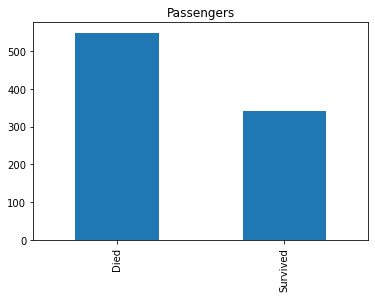

In [21]:
print(f"Died passengers percentage: {(dataset[dataset.Survived == 0].size / dataset.size) * 100}")
print(f"Survived passengers percentage: {(dataset[dataset.Survived == 1].size / dataset.size) * 100}")
dataset.Survived.value_counts()\
    .rename({
        0 : 'Died',
        1 : 'Survived'
    })\
    .plot.bar(title="Passengers")

It can be seen, that the percentage of died passengers(61.6%) overflow the percentage of survived ones (38.4%).

In [22]:
_sum = dataset[dataset.Survived == 1].Pclass.value_counts().sum()
dataset[dataset.Survived == 1].Pclass.value_counts()

1    136
3    119
2     87
Name: Pclass, dtype: int64

In [23]:
dataset[dataset.Survived == 1].Pclass.value_counts().apply(lambda x: f"{x / _sum * 100} %")

1     39.76608187134503 %
3      34.7953216374269 %
2    25.438596491228072 %
Name: Pclass, dtype: object

<AxesSubplot:title={'center':'Survived passengers grouped by Pclass'}>

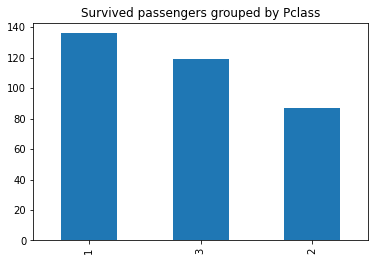

In [24]:
dataset[dataset.Survived == 1].Pclass.value_counts().plot.bar(title="Survived passengers grouped by Pclass")

It can be easily noted that classes aren't good balanced by looking at the proportion of the third column with the first and second one.

In [25]:
print(f"Average ticket fare: {dataset.Fare.mean()}")

Average ticket fare: 32.2042079685746


Average ticket fare is approximately 32 Pound sterling.

In [26]:
dataset.Embarked.value_counts()\
    .rename({
        "C": "Cherbourg",
        "Q": "Queenstown",
        "S": "Southampton"
    })

Southampton    644
Cherbourg      168
Queenstown      77
Name: Embarked, dtype: int64

Southampton is the most popular port of Embarkation.

**Task 2** (1 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column Name, and answer the following questions:

    * How many are there unique titles?
    * How many are there passengers with every title?
    * What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot.

In [27]:
titles = dataset.Name.str.findall(r"\w+\.").apply(lambda x: x[0])
print(f"Unique titles: {titles.unique()}")
print(f"Number of unique titles: {titles.unique().size}")

Unique titles: ['Mr.' 'Mrs.' 'Miss.' 'Master.' 'Don.' 'Rev.' 'Dr.' 'Mme.' 'Ms.' 'Major.'
 'Lady.' 'Sir.' 'Mlle.' 'Col.' 'Capt.' 'Countess.' 'Jonkheer.']
Number of unique titles: 17


In [28]:
titles.value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Mlle.          2
Major.         2
Capt.          1
Jonkheer.      1
Countess.      1
Lady.          1
Mme.           1
Don.           1
Sir.           1
Ms.            1
Name: Name, dtype: int64

There are 17 unique titles.
The most popular man's title is "Mr." and for woman it is - "Miss."

**Task 3** (0.5 points) <br/>
Visualize age distribution (you may use a histogram, for example). 

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
    * What is the mean age? Visualize it on the plot
    * Make conclusions about what you see on the plot

Minimal age: 0.42
Maximal age: 80.0
Mean age: 29.69911764705882


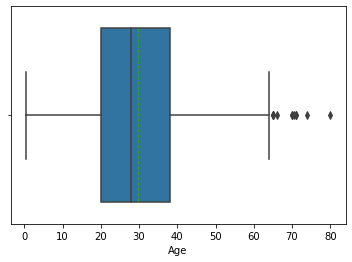

In [29]:
print(f'Minimal age: {dataset.Age.min()}')
print(f'Maximal age: {dataset.Age.max()}')
print(f'Mean age: {dataset.Age.mean()}')

sns.boxplot(x=dataset.Age, showmeans=True, meanline=True);

Plot above shows that the most frequently appeared ages belongs to range [20, 40] and the mean age of is almost 30.
The major group of ages belongs to young adults.

**Task 4** (0.5 points) <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Make conclusions about what you see on the plot

Died passengers mean age: 30.62617924528302
Survived passengers mean age: 28.343689655172415


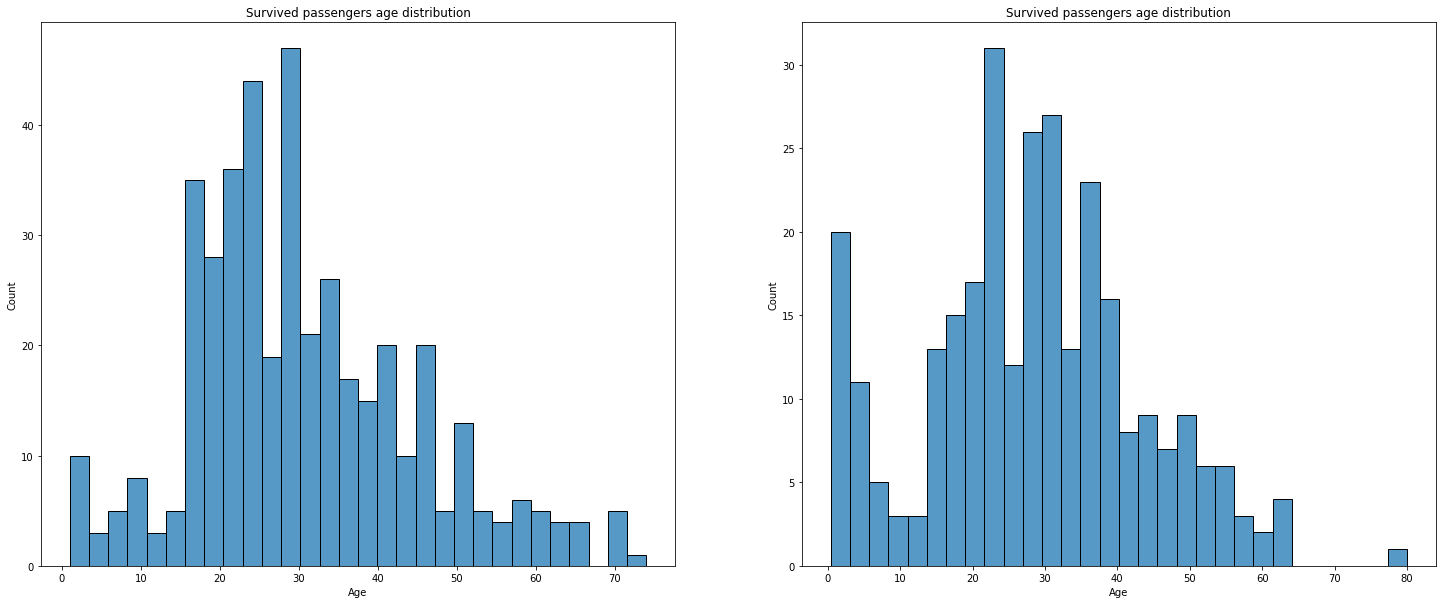

In [30]:
fig, ax = plt.subplots(
    nrows = 1, ncols = 2,
    figsize = (25, 10)
)

meta = {
    0: "Died",
    1: "Survived"
}

for cond in meta:
    s = dataset[dataset.Survived == cond].Age
    ax_ = ax[cond]
    print(f'{meta[cond]} passengers mean age: {s.mean()}')

    sns.histplot(s, ax=ax_, bins=30)
    ax_.set_title('Survived passengers age distribution')

plt.show()

It can be seen that both distributions the most frequent ages contains in range [20, 40].
As the largest age group belongs to young adult, the fact above is obvious. As for mean values,
they are close.

It can be seen that passengers with aged up to 10 survived more frequently and on the other side, the ones which were
older than 60 died more frequently :((.

**Task 5** (0.5 points) <br/>
Is there correlation between the port of embarkation and the ticket price? Calculate mean price for each port and visualize prize distribution for each port. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). main point here is to **choose** plots wisely and **make meaningful conclusions**


In [31]:
dataset.groupby('Embarked').Fare.mean().rename({
        "C": "Cherbourg",
        "Q": "Queenstown",
        "S": "Southampton"
    })

Embarked
Cherbourg      59.954144
Queenstown     13.276030
Southampton    27.079812
Name: Fare, dtype: float64

<AxesSubplot:title={'center':'Fare costs mean for ports'}, xlabel='Embarked'>

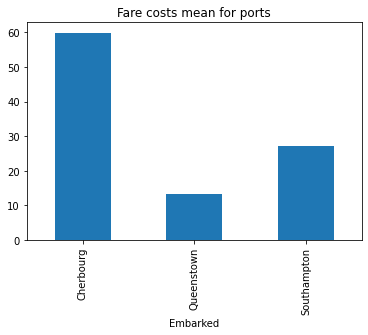

In [32]:
dataset.groupby('Embarked').Fare.mean().rename({
        "C": "Cherbourg",
        "Q": "Queenstown",
        "S": "Southampton"
    })\
.plot.bar(title='Fare costs mean for ports')

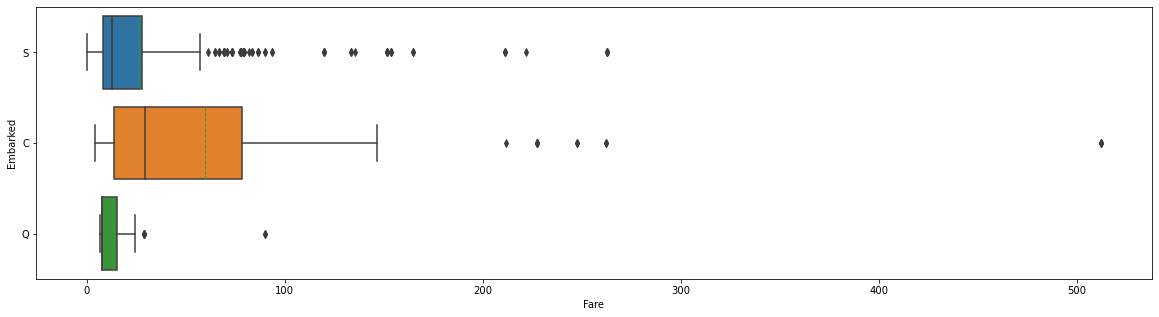

In [33]:
fig, ax = plt.subplots(figsize = (20, 5))

sns.boxplot(y=dataset.Embarked, x=dataset.Fare, showmeans=True, meanline=True)

plt.show()

It can be seen from plot above that there is correlation between tiket price and port.
Most expensive tikcets belong to Cherbourg, also it has the biggest amount of sold tickets among other ports.
As for Queenstown, it has the most cheap tickets compared to others.
=

**Task 6** (0.5 points) <br/>
The same question as in task 5 about correlation between *pclass* and *ticket priсe*.

In [34]:
dataset.groupby('Pclass').Fare.mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

<AxesSubplot:title={'center':'Fare costs mean for Pclasses'}, xlabel='Pclass'>

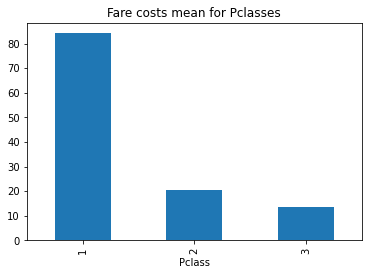

In [35]:
dataset.groupby('Pclass').Fare.mean().plot.bar(title='Fare costs mean for Pclasses')

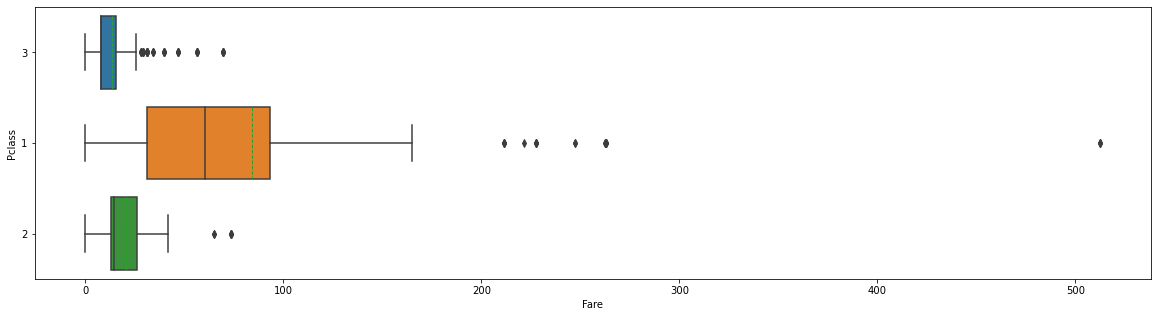

In [36]:
fig, ax = plt.subplots(figsize = (20, 5))

sns.boxplot(y=dataset.Pclass.astype('str'), x=dataset.Fare, showmeans=True, meanline=True)

plt.show()

This case is similar with the one above. The plot above is simethrical to the previous one, but instead of ports we have Pclasses.
It is obvious, that pclass 1 hase the most expensive and most large group of tickets. The 3 has the cheapest one among all of the others.